## Fall 2020 CX4641/CS7641 A Homework 2

## Instructor: Dr. Mahdi Roozbahani

## Deadline: Oct 6th, Tuesday, 11:59 pm AOE

* No unapproved extension of the deadline is allowed. Late submission will lead to 0 credit. 

* Discussion is encouraged on Piazza as part of the Q/A. However, all assignments should be done individually.


## Instructions for the assignment

- This assignment consists of both programming and theory questions.

- Q4 is bonus for both undergraduate and graduate students.

- To switch between cell for code and for markdown, see the menu -> Cell -> Cell Type
    
- You can directly type Latex equations into markdown cells.

- Typing with Latex\markdown is required for all the written questions. Handwritten answers will not be accepted. 
    
- If a question requires a picture, you could use this syntax $"<img src="" style="width: 300px;"/>"$ to include them within your ipython notebook.

## Using the autograder

- You will find two assignments on Gradescope that correspond to HW2: "HW2 - Programming" and "HW2 - Non-programming".

- You will submit your code for the autograder on "HW2 - Programming" in the following format:

    * kmeans.py
    * gmm.py
    * semisupervised.py

- All you will have to do is to copy your implementations of the classes "Kmeans", "GMM", "CleanData", "SemiSupervised" onto the respective files. We provided you different .py files and we added libraries in those files please DO NOT remove those lines and add your code after those lines. Note that these are the only allowed libraries that you can use for the homework.

- You are allowed to make as many submissions until the deadline as you like. Additionally, note that the autograder tests each function separately, therefore it can serve as a useful tool to help you debug your code if you are not sure of what part of your implementation might have an issue.

- **For the "HW2 - Non-programming" part, you will download your jupyter notbook as html and submit it as a PDF on Gradescope. To download the notebook as PDF, click on "File" on the top left corner of this page and select "Download as > PDF". The non-programming part corresponds to Q2, Q3.3 (both your response and the generated images with your implementation) and Q4.2**
- **When submitting to Gradescope, please make sure to mark the page(s) corresponding to each problem/sub-problem.**

## 0 Set up
This notebook is tested under [python 3.\*.\*](https://www.python.org/downloads/release/python-368/), and the corresponding packages can be downloaded from [miniconda](https://docs.conda.io/en/latest/miniconda.html). You may also want to get yourself familiar with several packages:

- [jupyter notebook](https://jupyter-notebook.readthedocs.io/en/stable/)
- [numpy](https://docs.scipy.org/doc/numpy-1.15.1/user/quickstart.html)
- [matplotlib](https://matplotlib.org/users/pyplot_tutorial.html)

Please implement the functions that have "raise NotImplementedError", and after you finish the coding, please delete or comment "raise NotImplementedError".

In [1]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

%matplotlib inline  

import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm

print('Version information')

print('python: {}'.format(sys.version))
print('matplotlib: {}'.format(matplotlib.__version__))
print('numpy: {}'.format(np.__version__))

# Set random seed so output is all same
np.random.seed(1)

# Load image
import imageio

Version information
python: 3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]
matplotlib: 3.2.2
numpy: 1.18.5


## 1. KMeans Clustering [5 + 30 + 10 + 5 + 10 pts]




KMeans is trying to solve the following optimization problem:

\begin{align}
\arg \min_S \sum_{i=1}^K \sum_{x_j \in S_i} ||x_j - \mu_i||^2
\end{align}
where one needs to partition the N observations into K clusters: $S = \{S_1, S_2, \ldots, S_K\}$ and each cluster has $\mu_i$ as its center.


### 1.1 pairwise distance [5pts]

In this section, you are asked to implement pairwise_dist function.

Given $X \in \mathbb{R}^{N x D}$ and $Y \in \mathbb{R}^{M x D}$, obtain the pairwise distance matrix $dist \in \mathbb{R}^{N x M}$ using the euclidean distance metric, where $dist_{i, j} = ||X_i - Y_j||_2$.  

DO NOT USE FOR LOOP in your implementation -- they are slow and will make your code too slow to pass our grader.  Use array broadcasting instead.

### 1.2 KMeans Implementation [30pts]

In this section, you are asked to implement _init_centers [5pts], _update_assignment [10pts], _update_centers [10pts] and _get_loss function [5pts].

For the function signature, please see the corresponding doc strings.

### 1.3 Find the optimal number of clusters [10 pts]

In this section, you are asked to implement find_optimal_num_clusters function.

You will now use the elbow method to find the optimal number of clusters.

### 1.4 Autograder test to find centers for data points [5 pts]

To obtain these 5 points, you need to be pass the tests set up in the autograder. These will test the centers created by your implementation. Be sure to upload the correct files to obtain these points.

In [4]:
class KMeans(object):
    
    def __init__(self): #No need to implement
        pass
    
    def pairwise_dist(self, x, y): # [5 pts]
        """
        Args:
            x: N x D numpy array
            y: M x D numpy array
        Return:
                dist: N x M array, where dist2[i, j] is the euclidean distance between 
                x[i, :] and y[j, :]
                """
        raise NotImplementedError

    def _init_centers(self, points, K, **kwargs): # [5 pts]
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            kwargs: any additional arguments you want
        Return:
            centers: K x D numpy array, the centers. 
        """
        raise NotImplementedError

    def _update_assignment(self, centers, points): # [10 pts]
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            points: NxD numpy array, the observations
        Return:
            cluster_idx: numpy array of length N, the cluster assignment for each point
            
        Hint: You could call pairwise_dist() function.
        """
        raise NotImplementedError

    def _update_centers(self, old_centers, cluster_idx, points): # [10 pts]
        """
        Args:
            old_centers: old centers KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            centers: new centers, K x D numpy array, where K is the number of clusters, and D is the dimension.
        """
        raise NotImplementedError

    def _get_loss(self, centers, cluster_idx, points): # [5 pts]
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            loss: a single float number, which is the objective function of KMeans. 
        """
        raise NotImplementedError
        
    def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, verbose=False, **kwargs):
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            max_iters: maximum number of iterations (Hint: You could change it when debugging)
            abs_tol: convergence criteria w.r.t absolute change of loss
            rel_tol: convergence criteria w.r.t relative change of loss
            verbose: boolean to set whether method should print loss (Hint: helpful for debugging)
            kwargs: any additional arguments you want
        Return:
            cluster assignments: Nx1 int numpy array
            cluster centers: K x D numpy array, the centers
            loss: final loss value of the objective function of KMeans
        """
        centers = self._init_centers(points, K, **kwargs)
        for it in range(max_iters):
            cluster_idx = self._update_assignment(centers, points)
            centers = self._update_centers(centers, cluster_idx, points)
            loss = self._get_loss(centers, cluster_idx, points)
            K = centers.shape[0]
            if it:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol:
                    break
            prev_loss = loss
            if verbose:
                print('iter %d, loss: %.4f' % (it, loss))
        return cluster_idx, centers, loss
    
    def find_optimal_num_clusters(self, data, max_K=15): # [10 pts]
        """Plots loss values for different number of clusters in K-Means
        
        Args:
            image: input image of shape(H, W, 3)
            max_K: number of clusters
        Return:
            losses: an array of loss denoting the loss of each number of clusters
        """
        
        raise NotImplementedError


In [5]:
# Helper function for checking the implementation of pairwise_distance fucntion. Please DO NOT change this function
# TEST CASE
x = np.random.randn(2, 2)
y = np.random.randn(3, 2)

print("*** Expected Answer ***")
print("""==x==
[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]]
==y==
[[ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]]
==dist==
[[1.85239052 0.19195729 1.35467638]
 [1.85780729 2.29426447 1.18155842]]""")


print("\n*** My Answer ***")
print("==x==")
print(x)
print("==y==")
print(y)
print("==dist==")
print(KMeans().pairwise_dist(x, y))

*** Expected Answer ***
==x==
[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]]
==y==
[[ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]]
==dist==
[[1.85239052 0.19195729 1.35467638]
 [1.85780729 2.29426447 1.18155842]]

*** My Answer ***
==x==
[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]]
==y==
[[ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]]
==dist==
[[1.85239052 0.19195729 1.35467638]
 [1.85780729 2.29426447 1.18155842]]


In [11]:
def image_to_matrix(image_file, grays=False):
    """
    Convert .png image to matrix
    of values.
    params:
    image_file = str
    grays = Boolean
    returns:
    img = (color) np.ndarray[np.ndarray[np.ndarray[float]]]
    or (grayscale) np.ndarray[np.ndarray[float]]
    """
    img = plt.imread(image_file)
    # in case of transparency values
    if len(img.shape) == 3 and img.shape[2] > 3:
        height, width, depth = img.shape
        new_img = np.zeros([height, width, 3])
        for r in range(height):
            for c in range(width):
                new_img[r, c, :] = img[r, c, 0:3]
        img = np.copy(new_img)
    if grays and len(img.shape) == 3:
        height, width = img.shape[0:2]
        new_img = np.zeros([height, width])
        for r in range(height):
            for c in range(width):
                new_img[r, c] = img[r, c, 0]
        img = new_img
    return img

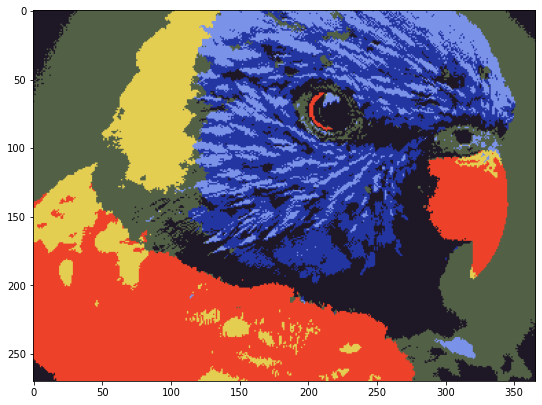

In [12]:
image_values = image_to_matrix('./images/bird_color_24.png')

r = image_values.shape[0]
c = image_values.shape[1]
ch = image_values.shape[2]
# flatten the image_values
image_values = image_values.reshape(r*c,ch)

k = 6 # feel free to change this value
cluster_idx, centers, loss = KMeans()(image_values, k)
updated_image_values = np.copy(image_values)

# assign each pixel to cluster mean
for i in range(0,k):
    indices_current_cluster = np.where(cluster_idx == i)[0]
    updated_image_values[indices_current_cluster] = centers[i]
    
updated_image_values = updated_image_values.reshape(r,c,ch)

plt.figure(None,figsize=(9,12))
plt.imshow(updated_image_values)
plt.show()


In [ ]:
KMeans().find_optimal_num_clusters(image_values)

## Silhouette Coefficient Evaluation [10 pts]

The average silhouette of the data is another useful criterion for assessing the natural number of clusters. The silhouette of a data instance is a measure of how closely it is matched to data within its cluster and how loosely it is matched to data of the neighbouring cluster.

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

In [ ]:
def intra_cluster_dist(cluster_idx, data, labels): # [4 pts]
    """
    Calculates the average distance from a point to other points within the same cluster
    
    Args:
        cluster_idx: the cluster index (label) for which we want to find the intra cluster distance
        data: NxD numpy array, where N is # points and D is the dimensionality
        labels: 1D array of length N where each number indicates of cluster assignement for that point
    Return:
        intra_dist_cluster: 1D array where the i_th entry denotes the average distance from point i 
                            in cluster denoted by cluster_idx to other points within the same cluster
    """
    raise NotImplementedError

def inter_cluster_dist(cluster_idx, data, labels): # [4 pts]
    """
    Calculates the average distance from one cluster to the nearest cluster
    Args:
        cluster_idx: the cluster index (label) for which we want to find the intra cluster distance
        data: NxD numpy array, where N is # points and D is the dimensionality
        labels: 1D array of length N where each number indicates of cluster assignement for that point
    Return:
        inter_dist_cluster: 1D array where the i-th entry denotes the average distance from point i in cluster
                            denoted by cluster_idx to the nearest neighboring cluster
    """
    raise NotImplementedError

def silhouette_coefficient(data, labels): #[2 pts]
    """
    Finds the silhouette coefficient of the current cluster assignment
    
    Args:
        data: NxD numpy array, where N is # points and D is the dimensionality
        labels: 1D array of length N where each number indicates of cluster assignement for that point
    Return:
        silhouette_coefficient: Silhouette coefficient of the current cluster assignment
    """
    raise NotImplementedError

In [ ]:
def plot_silhouette_coefficient(data, max_K=15):
    """
    Plot silhouette coefficient for different number of clusters, no need to implement
    """
    clusters = np.arange(2, max_K+1)
    
    silhouette_coefficients = []
    for k in range(2, max_K+1):
        labels, _, _ = KMeans()(data, k)
        silhouette_coefficients.append(silhouette_coefficient(data, labels))
    plt.plot(clusters, silhouette_coefficients)
    return silhouette_coefficients


data = np.random.rand(200,3) * 100
plot_silhouette_coefficient(data)

### Limitation of K-Means

One of the limitations of K-Means Clustering is that it dependes largely on the shape of the dataset. A common example of this is trying to cluster one circle within another (concentric circles). A K-means classifier will fail to do this and will end up effectively drawing a line which crosses the circles. You can visualize this limitation in the cell below.

/home/chaudhsh/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


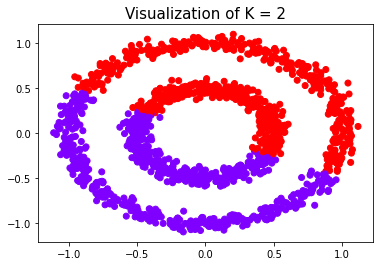

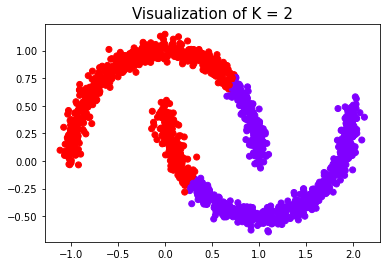

In [14]:
# visualize limitation of kmeans, do not have to implement
from sklearn.datasets.samples_generator import (make_circles, make_moons)

X1, y1 = make_circles(factor=0.5, noise=0.05, n_samples=1500)
X2, y2 = make_moons(noise=0.05, n_samples=1500)

def visualise(X, C, K):# Visualization of clustering. You don't need to change this function   
    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], c=C,cmap='rainbow')
    plt.title('Visualization of K = '+str(K), fontsize=15)
    plt.show()
    pass

cluster_idx1, centers1, loss1 = KMeans()(X1, 2)
visualise(X1, cluster_idx1, 2)

cluster_idx2, centers2, loss2 = KMeans()(X2, 2)
visualise(X2, cluster_idx2, 2)

## 2. EM algorithm [20 pts]


### 2.1 Performing EM Update [10 pts]

A univariate Gaussian Mixture Model (GMM) has two components, both of which have their own mean and standard deviation. The model is defined by the following parameters:

$$ \mathbf{z} \sim Bernoulli(\theta) $$
$$ \mathbf{p(x|z=0)} \sim \mathcal{N}(\mu, \sigma) $$
$$ \mathbf{p(x|z=1)} \sim \mathcal{N}(2\mu, 3\sigma) $$

For a dataset of N datapoints, find the following: 


2.1.1. Write the marginal probability of x, i.e. $\mathbf{p(x)}$  \[2pts] 


2.1.2. E-Step: Compute the posterior probability, i.e, $p(z^i=k|x^i)$, where k = {0,1} \[2pts]


2.1.3. M-Step: Compute the updated value of $\mu$ (You can keep $\sigma$ fixed for this) \[3pts]


2.1.4. M-Step: Compute the updated value for $\sigma$ (You can keep $\mu$ fixed for this) \[3pts]

### 2.2 EM Algorithm in ABO Blood Groups [10 pts]

In the ABO blood group system, each individual has a phenotype and a genotype as shown below. The genotype is made of underlying alleles (A, B, O).

$$
\begin{array}{|c|c|}\hline Phenotype & Genotype   \\ \hline A & AA   \\ \hline A & AO 
\\ \hline A & OA  \\ \hline B & BB  \\ \hline B & BO 
\\ \hline B & OB  \\ \hline O & OO \\ \hline AB & AB
\\\hline\end{array}
$$

In a research experiment, scientists wanted to model the distribution of the genotypes of the population. They collected the phenotype information from the participants as this could be directly observed from the individual's blood group. The scientists, however want to use this data to model the underlying genotype information. In order to help them obtain an understanding, you suggest using the EM algorithm to find out the genotype distribution.

You know that the probability of that an allele is present in an individual is independent of the probability of any other allele, i.e, $P(AO) = P(OA) = P(A)* P(O)$ and so on. Also note that the genotype pairs: (AO, OA) and (BO, OB) are identical and can be treated as AO, BO respectively. You also know that the alleles follow a multinomial distribution.
$$ p(O) = 1 - p(A) - p(B) $$

Let $ n_A, n_B, n_O, n_{AB}$ be the number of individuals with the phenotypes A, B, O and AB respectively.\
Let $ n_{AA}, n_{AO}, n_{BB}, n_{BO}, n_{AB} $ be the numbers of individuals with genotypes AA, AO, BB, BO and AB respectively.\
The satisfy the following conditions: 
$$ n_A = n_{AA} + n_{AO} $$ $$n_B = n_{BB} + n_{BO} $$
$$ n_A + n_B + n_O + n_{AB} = n $$


Given:
$$ p_A = p_B = p_O = \frac{1}{3} $$
$$ n_A = 186, n_B = 38, n_O = 284, n_{AB} = 13 $$

2.2.1. 
In the E step, compute the value of  $n_{AA}, n_{AO}, n_{BB}, n_{BO} $.  \[5pts]

2.2.2. In the M step, find the new value of $p_A, p_B$ given the updated values from E-step above.
(Round off the answer to 3 decimal places)   \[5pts]


## 3. GMM implementation [40 + 10 + 5(bonus) pts]

A Gaussian Mixture Model(GMM) is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian Distribution. In a nutshell, GMM is a soft clustering algorithm in a sense that each data point is assigned to a cluster with a probability. In order to do that, we need to convert our clustering problem into an inference problem.

Given $N$ samples $X = [x_1, x_2, \ldots, x_N]^T$, where $x_i \in \mathbb{R}^D$. Let $\pi$ be a K-dimentional probability distribution and $(\mu_k; \Sigma_k)$ be the mean and covariance matrix of the $k^{th}$ Gaussian distribution in $\mathbb{R}^d$. 

The GMM object implements EM algorithms for fitting the model and MLE for optimizing its parameters. It also has some particular hypothesis on how the data was generated:

- Each data point $x_i$ is assigned to a cluster $k$ with probability of $\pi_k$ where $\sum_{k=1}^K \pi_k = 1$
- Each data point $x_i$ is generated from Multivariate Normal Distribution $\cal{N}(\mu_k, \Sigma_k)$ where $\mu_k \in \mathbb{R}^D$ and $\Sigma_k \in \mathbb{R}^{D\times D}$

Our goal is to find a $K$-dimension Gaussian distributions to model our data $X$. This can be done by learning the parameters $\pi, \mu$ and $\Sigma$ through likelihood function. Detailed derivation can be found in our slide of GMM. The log-likelihood function now becomes:

\begin{align}
    \text{ln } p(x_1, \dots, x_N | \pi, \mu, \Sigma) = \sum_{i=1}^N \text{ln } \big( \sum_{k=1}^{K} \pi(k) \mathcal{N}(x_i | \mu_k, \Sigma_k)\big)
\end{align}

From the lecture we know that MLEs for GMM all depend on each other and the responsibility $\tau$. Thus, we need to use an iterative algorithm (the EM algorithm) to find the estimate of parameters that maximize our likelihood function. **All detailed derivations can be found in the lecture slide of GMM.**

- **E-step:** Evaluate the responsibilities

In this step, we need to calculate the responsibility $\tau$, which is the conditional probability that a data point belongs to a specific cluster $k$ if we are given the datapoint, i.e. $P(z_k|x)$. The formula for $\tau$ is given below:

$$
\tau\left(z_k\right)=\frac{\pi_{k} N\left(x | \mu_{k}, \Sigma_{k}\right)}{\sum_{j=1}^{K} \pi_{j} N\left(x | \mu_{j}, \Sigma_{j}\right)}, \quad \text{for } k = 1, \dots, K
$$
Note that each data point should have one probability for each component/cluster. For this homework, you will work with $\tau\left(z_k\right)$ which has a size of $N\times K$ and you should have all the responsibility values in one matrix. **We use gamma as $\tau$ in this homework**.

- **M-step:** Re-estimate Paramaters

After we obtained the responsibility, we can find the update of parameters, which are given below:

\begin{align}
\mu_k^{new} &= \dfrac{\sum_{n=1}^N \tau(z_k)x_n}{N_k} \\
\Sigma_k^{new} &= \dfrac{1}{N_k}\sum_{n=1}^N \tau (z_k)^T(x_n - \mu_k^{new})^T(x_n-\mu_k^{new}) \\
\pi_k^{new} &= \dfrac{N_k}{N}
\end{align}
where $N_k = \sum_{n=1}^N \tau(z_k)$. Note that the updated value for $\mu_k$ is used when updating $\Sigma_k$. The multiplication of $\tau (z_k)^T(x_n - \mu_k^{new})^T$ is element-wise so it will preserve the dimensions of $(x_n - \mu_k^{new})^T$.

- We repeat E and M steps until the incremental improvement to the likelihood function is small.


**Special Notes**
- For undergraduate students: you may assume that the covariance matrix $\Sigma$ is a diagonal matrix, which means the features are independent. (i.e. the red intensity of a pixel is independent of its blue intensity, etc). 
- For graduate students: please assume a full covariance matrix.
- The class notes assume that your dataset $X$ is $(D, N)$. However, the homework dataset is $(N, D)$ as mentioned on the instructions, so the formula is a little different from the lecture note in order to obtain the right dimensions of parameters.

**Hints**

1. **DO NOT USE FOR LOOPS OVER N.** You can always find a way to avoid looping over the observation data points in our homework problem. If you have to loop over D or K, that would be fine.

2. You can initiate $\pi(k)$ the same for each $k$, i.e. $\pi(k) = \frac{1}{K}, \forall k = 1, 2, \ldots, K$.

3. In part 3 you are asked to generate the model for pixel clustering of image. We will need to use a multivariate Gaussian because each image will have $N$ pixels and $D=3$ features, which correspond to red, green, and blue color intensities. It means that each image is a $(N\times3)$ dataset matrix. In the following parts, remember $D=3$ in this problem.

4. To avoid using for loops in your code, we recommend you take a look at the concept [Array Broadcasting in Numpy](https://numpy.org/doc/stable/user/theory.broadcasting.html#array-broadcasting-in-numpy). Also, some calculations that required different shapes of arrays can be achieved by broadcasting. 

5. Be careful of the dimensions of your parameters. Before you test anything on the autograder, please look at the instructions below on the shapes of the variables you need to output. This could enhance the functionality of your code and help you debug. Also notice that **a numpy array in shape $(N,1)$ is NOT the same as that in shape $(N,)$** so be careful and consistent on what you are using. You can see the detailed explanation here. [Difference between numpy.array shape (R, 1) and (R,)](https://stackoverflow.com/questions/22053050/difference-between-numpy-array-shape-r-1-and-r)
 - The dataset $X$: $(N, D)$
 - $\mu$: $(K, D)$. 
 - $\Sigma$: $(K, D, D)$
 - $\tau$: $(N, K)$
 - $\pi$: array of length $K$
 - ll_joint: $(N, K)$

## 3.1 Helper functions [15 pts]

To facilitate some of the operations in the GMM implementation, we would like you to implement the following three helper functions. In these functions, "logit" refers to an input array of size $(N, D)$. Remember the goal of helper functions is to facilitate our calculation so **DO NOT USE FOR LOOP ON N**.

### 3.1.1. softmax [5 pts]

Given $logit \in \mathbb{R}^{N \times D}$, calculate $prob \in \mathbb{R}^{N \times D}$, where $prob_{i, j} = \frac{\exp(logit_{i, j})}{\sum_{d=1}^D exp(logit_{i, d})}$.

Note: it is possible that $logit_{i, j}$ is very large, making $\exp(\cdot)$ of it to explode. To make sure it is numerically stable, you need to subtract the maximum for each row of $logits$, and then add it back in your result.

### 3.1.2. logsumexp [5 pts]

Given $logit \in \mathbb{R}^{N \times D}$, calculate $s \in \mathbb{R}^N$, where $s_i = \log \big( \sum_{j=1}^D \exp(logit_{i, j}) \big)$. Again, pay attention to the numerical problem. You may want to use similar trick as in the softmax function. Note: This function is used in the call() function which is given, so you will not need it in your own implementation. It helps calculate the loss of log-likehood. 


### 3.1.3. Multivariate Gaussian PDF [5 pts]
You should be able to write your own function based on the following formula, and you are NOT allowed to use outside resource packages other than those we provided. 

**(for undergrads only) normalPDF**

Using the covariance matrix as a diagonal matrix with variances of the individual variables appearing on the main diagonal of the matrix and zeros everywhere else means that we assume the features are independent. In this case, the multivariate normal density function simplifies to the expression below:
$$\mathcal{N}(x: \mu, \Sigma) = \prod_{i=1}^D \frac{1}{\sqrt{2\pi\sigma_i^2}}\exp{\left( -\frac{1}{2\sigma_i^2} (x_i-\mu_i)^2\right)}$$
where $\sigma^2_i$ is the variance for the $i^{th}$ feature, which is the diagonal element of the covariance matrix.

**(for grads only) multinormalPDF**

Given the dataset $X \in \mathbb{R}^{N \times D}$, the mean vector $\mu \in \mathbb{R}^{D}$ and covariance matrix $\Sigma \in \mathbb{R}^{D \times D}$ for a multivariate Gaussian distrubution, calculate the probability $p \in \mathbb{R}^{N}$ of each data. The PDF is given by 
$$\mathcal{N}(X: \mu, \Sigma) = \frac{1}{(2\pi)^{D/2}}|\Sigma|^{-1/2}\exp{\left(-\frac{1}{2}(X-\mu)\Sigma^{-1}(X-\mu)^T\right)}$$
where $|\Sigma|$ is the determinant of the covariance matrix.


**Hints**
- If you encounter "LinAlgError", you can mitigate your number/array by summing a small value before taking the operation, e.g. np.linalg.inv(\$\Sigma_k$ + 1e-32). You can arrest and handle such error by using [Try and Exception Block](https://realpython.com/python-exceptions/#the-try-and-except-block-handling-exceptions) in Python.

- In the above calculation, you must avoid computing a $(N,N)$ matrix. Using the above equation for large N will crash your kernel and/or give you a memory error on Gradescope. Instead, you can do this same operation by calculating $(X-\mu)\Sigma^{-1}$, a $(N,D)$ matrix, transpose it to be a $(D,N)$ matrix and do an element-wise multiplication with $(X-\mu)^T$, which is also a $(D,N)$ matrix. Lastly, you will need to sum over the 0 axis to get a $(1,N)$ matrix before proceeding with the rest of the calculation. This uses the fact that doing an element-wise multiplication and summing over the 0 axis is the same as taking the diagonal of the $(N,N)$ matrix from the matrix multiplication. 
- In Numpy implementation for $\mu$, you can either use a 2-D array with dimension $(1,D)$ for each Gaussian Distribution, or a 1-D array with length $D$. Same to other array parameters. Both ways should be acceptable but pay attention to the shape mismatch problem and be **consistent all the time** when you implement such arrays. 

## 3.2 GMM Implementation [25 pts]

Things to do in this problem:
### 3.2.1. Initialize parameters in _init_components() [5 pts]

Examples of how you can initialize the parameters. 
  1. Set the prior probability $\pi$ the same for each class.
  2. Initialize $\mu$ by randomly selecting K numbers of observations as the initial mean vectors, and initialize the covariance matrix with np.eye() for each k. For grads, you can also initialize the $\Sigma$ by K diagonal matrices. It will become a full matrix after one iteration, as long as you adopt the correct computation.
  3. Other ways of initialization are acceptable and welcome.

### 3.2.2. Formulate the log-likelihood function _ll_joint() [5 pts]

The log-likelihood function is given by:
\begin{align}
    \ell(\theta) = \sum_{i=1}^N \text{ln } \big( \sum_{k=1}^{K} \pi(k) \mathcal{N}(x_i | \mu_k, \Sigma_k)\big)
\end{align}
In this part, we will generate a $(N,K)$ matrix where each datapoint $x_i, \forall i = 1, \dots, N$ has $K$ log-likelihood numbers. Thus, for each $i = 1, \dots, N$ and $k = 1, \dots, K$, 
$$
\text{log-likelihood}[i,k] = \log{\pi_k}+\log{\cal{N}(x_i|\mu_k, \Sigma_k)}
$$

**Hints:**
- If you encounter "ZeroDivisionError" or "RuntimeWarning: divide by zero encountered in log", you can mitigate your number/array by summing a small value before taking the operation, e.g. np.log(\$\pi_k$ + 1e-32). 
- You need to use the Multivariate Normal PDF function you created in the last part. Remember the PDF function is for each Gaussian Distribution (i.e. for each k) so you need to use a for loop over K. 


### 3.2.3. Setup Iterative steps for EM Algorithm  [5+10 pts]

You can find the detail instruction in the above description box. 

**Hints:**
- For E steps, we already get the log-likelihood at _ll_joint() function. This is not the same as responsibilities ($\tau$), but you should be able to finish this part with just a few lines of code by using _ll_joint() and softmax() defined above. 
- For undergrads: Try to simplify your calculation for $\Sigma$ in M steps as you assumed independent components. Make sure you are only taking the diagonal terms of your calculated covariance matrix.

In [81]:
class GMM(object):
    def __init__(self, X, K, max_iters = 100): # No need to change
        """
        Args: 
            X: the observations/datapoints, N x D numpy array
            K: number of clusters/components
            max_iters: maximum number of iterations (used in EM implementation)
        """
        self.points = X
        self.max_iters = max_iters
        
        self.N = self.points.shape[0]        #number of observations
        self.D = self.points.shape[1]        #number of features
        self.K = K                           #number of components/clusters

    #Helper function for you to implement
    def softmax(self, logit): # [5pts]
        """
        Args:
            logit: N x D numpy array
        Return:
            prob: N x D numpy array. See the above function.
        """
        raise NotImplementedError

    def logsumexp(self, logit): # [5pts]
        """
        Args:
            logit: N x D numpy array
        Return:
            s: N x 1 array where s[i,0] = logsumexp(logit[i,:]). See the above function
        """
        raise NotImplementedError

    #for undergraduate student
    def normalPDF(self, logit, mu_i, sigma_i): #[5pts]
        """
        Args: 
            logit: N x D numpy array
            mu_i: 1xD numpy array (or array of lenth D), the center for the ith gaussian.
            sigma_i: 1xDxD 3-D numpy array (or DxD 2-D numpy array), the covariance matrix of the ith gaussian.  
        Return:
            pdf: 1xN numpy array (or array of length N), the probability distribution of N data for the ith gaussian
            
        Hint: 
            np.diagonal() should be handy.
        """
        
        raise NotImplementedError
    
    #for grad students
    def multinormalPDF(self, logits, mu_i, sigma_i):  #[5pts]
        """
        Args: 
            logit: N x D numpy array
            mu_i: 1xD numpy array (or array of lenth D), the center for the ith gaussian.
            sigma_i: 1xDxD 3-D numpy array (or DxD 2-D numpy array), the covariance matrix of the ith gaussian.  
        Return:
            pdf: 1xN numpy array (or array of length N), the probability distribution of N data for the ith gaussian
         
        Hint: 
            np.linalg.det() and np.linalg.inv() should be handy.
        """
        raise NotImplementedError
    
    
    def _init_components(self, **kwargs): # [5pts]
        """
        Args:
            kwargs: any other arguments you want
        Return:
            pi: numpy array of length K, prior
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian. 
        """
        raise NotImplementedError

    
    def _ll_joint(self, pi, mu, sigma, **kwargs): # [10 pts]
        """
        Args:
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian. You will have KxDxD numpy
            array for full covariance matrix case
            
        Return:
            ll(log-likelihood): NxK array, where ll(i, k) = log pi(k) + log NormalPDF(points_i | mu[k], sigma[k])
        """

        raise NotImplementedError

    def _E_step(self, pi, mu, sigma, **kwargs): # [5pts]
        """
        Args:
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian.You will have KxDxD numpy
            array for full covariance matrix case
        Return:
            gamma(tau): NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            
        Hint: 
            You should be able to do this with just a few lines of code by using _ll_joint() and softmax() defined above. 
        """
        
        raise NotImplementedError

    def _M_step(self, gamma, **kwargs): # [10pts]
        """
        Args:
            gamma(tau): NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
        Return:
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian. You will have KxDxD numpy
            array for full covariance matrix case
            
        Hint:  
            There are formulas in the slide and in the above description box.
        """
        
        raise NotImplementedError
    
    
    def __call__(self, abs_tol=1e-16, rel_tol=1e-16, **kwargs): # No need to change
        """
        Args:
            abs_tol: convergence criteria w.r.t absolute change of loss
            rel_tol: convergence criteria w.r.t relative change of loss
            kwargs: any additional arguments you want
        
        Return:
            gamma(tau): NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            (pi, mu, sigma): (1xK np array, KxD numpy array, KxDxD numpy array)       
        
        Hint: 
            You do not need to change it. For each iteration, we process E and M steps, then update the paramters. 
        """
        pi, mu, sigma = self._init_components(**kwargs)
        pbar = tqdm(range(self.max_iters))
        
        for it in pbar:
            # E-step
            gamma = self._E_step(pi, mu, sigma)
            
            # M-step
            pi, mu, sigma = self._M_step(gamma)
            
            # calculate the negative log-likelihood of observation
            joint_ll = self._ll_joint(pi, mu, sigma)
            loss = -np.sum(self.logsumexp(joint_ll))
            if it:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol:
                    break
            prev_loss = loss
            pbar.set_description('iter %d, loss: %.4f' % (it, loss))
        return gamma, (pi, mu, sigma)

## 3.3 Japanese art and pixel clustering [10pts + 5pts]

Ukiyo-e is a Japanese art genre predominant from the 17th through 19th centuries. In order to produce the intricate prints that came to represent the genre, artists carved wood blocks with the patterns for each color in a design. Paint would be applied to the block and later transfered to the print to form the image.
In this section, you will use your GMM algorithm implementation to do pixel clustering and estimate how many wood blocks were likely used to produce a single print. That is to say, how many wood blocks would appropriatly produce the original paint. 
(Hint: you can justify your answer based on visual inspection of the resulting images or on a different metric of your choosing)
#### You do NOT need to submit your code for this question to the autograder. Instead you should include whatever images/information you find relevant in the report.

In [59]:
# helper function for performing pixel clustering. You don't have to modify it
def cluster_pixels_gmm(image, K):
    """Clusters pixels in the input image
    
    Args:
        image: input image of shape(H, W, 3)
        K: number of components
    Return:
        clustered_img: image of shape(H, W, 3) after pixel clustering
    """
    im_height, im_width, im_channel = image.shape
    flat_img = np.reshape(image, [-1, im_channel]).astype(np.float32)
    gamma, (pi, mu, sigma) = GMM(flat_img, K = K, max_iters = 100)()
    cluster_ids = np.argmax(gamma, axis=1)
    centers = mu

    gmm_img = np.reshape(centers[cluster_ids], (im_height, im_width, im_channel))
    
    return gmm_img

# helper function for plotting images. You don't have to modify it
def plot_images(img_list, title_list, figsize=(20, 10)):
    assert len(img_list) == len(title_list)
    fig, axes = plt.subplots(1, len(title_list), figsize=figsize)
    for i, ax in enumerate(axes):
        ax.imshow(img_list[i] / 255.0)
        ax.set_title(title_list[i])
        ax.axis('off')

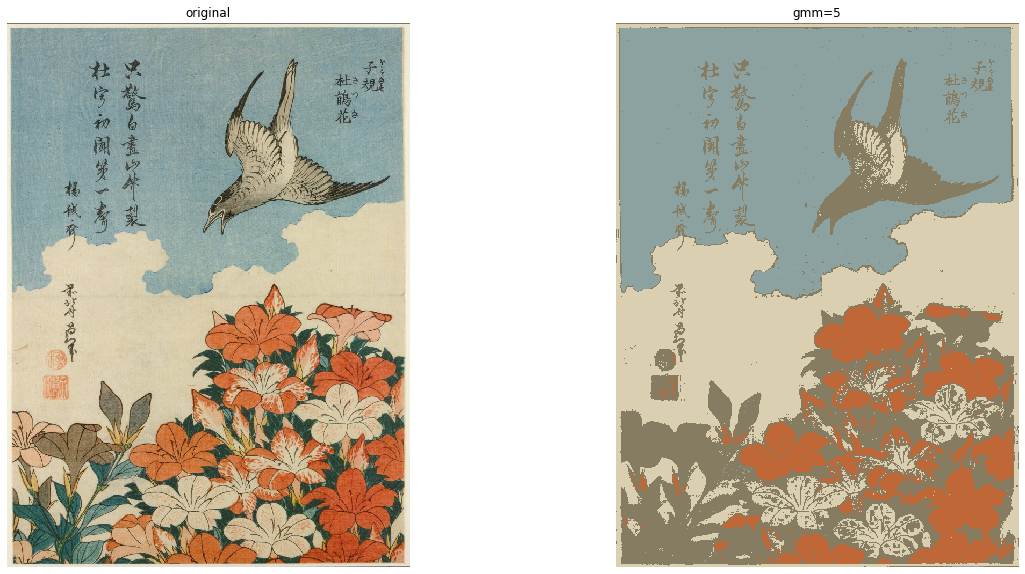

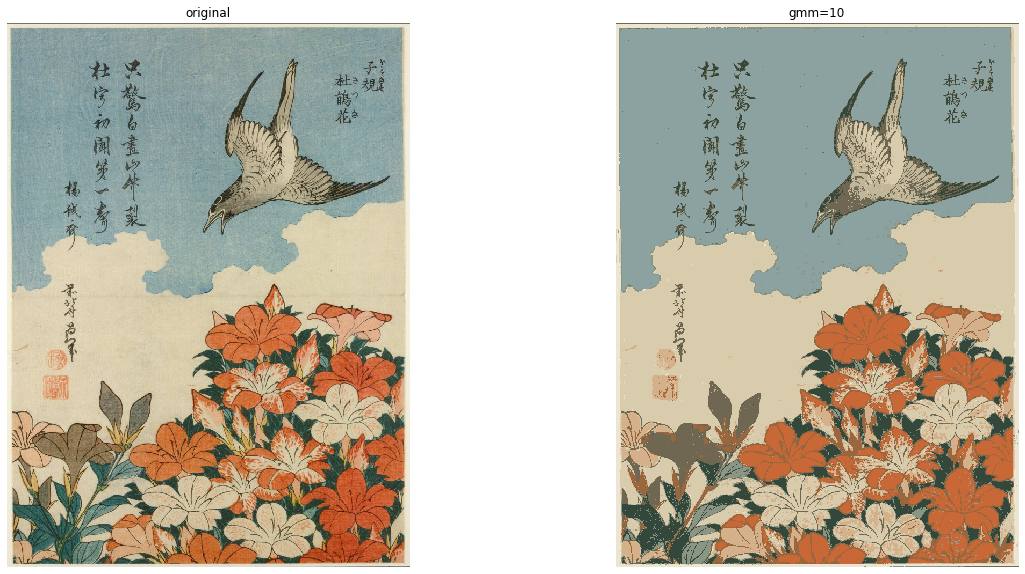

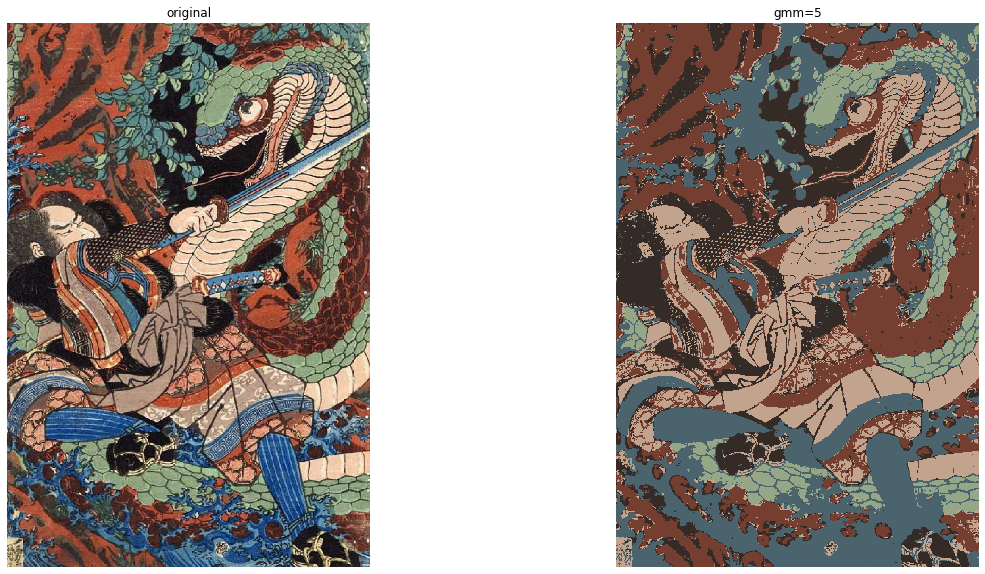

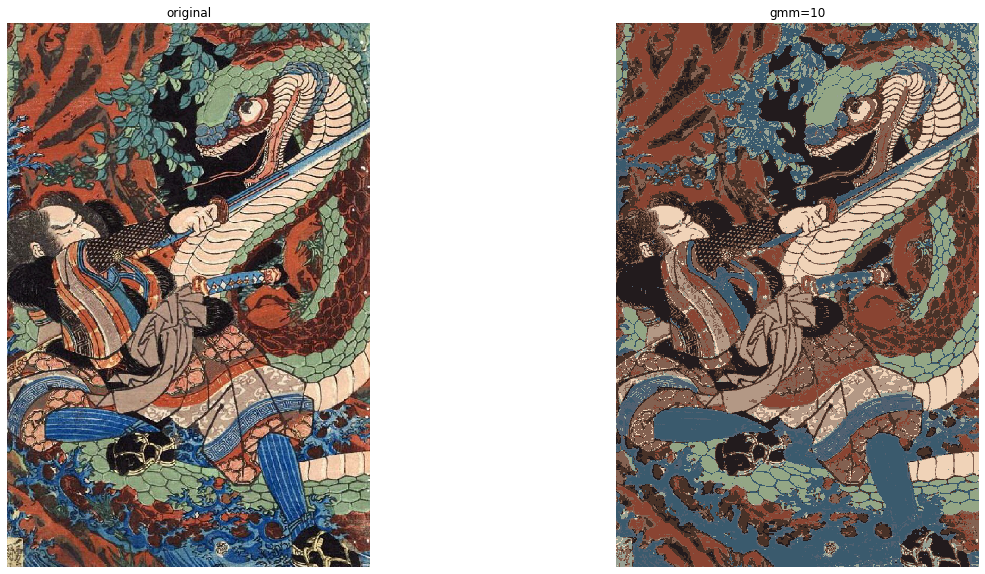

In [77]:
# pick 2 of the images in this list:
url0 = 'https://upload.wikimedia.org/wikipedia/commons/b/b1/Utagawa_Kunisada_I_%28c._1832%29_Dawn_at_Futami-ga-ura.jpg'
url1 = 'https://upload.wikimedia.org/wikipedia/commons/9/95/Hokusai_%281828%29_Cuckoo_and_Azaleas.jpg'
url2 = 'https://upload.wikimedia.org/wikipedia/commons/7/74/Kitao_Shigemasa_%281777%29_Geisha_and_a_servant_carrying_her_shamisen_box.jpg'
url3 = 'https://upload.wikimedia.org/wikipedia/commons/1/10/Kuniyoshi_Utagawa%2C_Suikoden_Series_4.jpg'

# example of loading image from url0
image = imageio.imread(imageio.core.urlopen(url0).read())

# this is for you to implement
def find_n_woodblocks(image, min_clusters=5, max_clusters=15):
    """
    Using the helper function above to find the optimal number of woodblocks that can appropriatly produce a single image.
    You can simply examinate the answer based on your visual inspection (i.e. looking at the resulting images) or provide any metrics you prefer. 
    
    Args:
        image: input image of shape(H, W, 3)
        min_clusters, max_clusters: the minimum and maximum number of clusters you should test with. Default are 5a dn 15.
        (Usually the maximum number of clusters would not exeed 15)
        
    Return:
        plot: comparison between original image and image pixel clustering.
        optional: any other information/metric/plot you think is necessary.
    """
    
    raise NotImplementedError

### (Bonus for All) [5 pts]
Compare the full covariance matrix with the diagonal covariance matrix in GMM. Can you explain why the images are different with the same clusters?
Note: You will have to implement both multinormalPDF and normalPDF, and add a few arguments in the original _ll_joint() and _Mstep() function to indicate which matrix you are using. You will earn full credit only if you implement both functions AND explain the reason.

In [91]:
def compare_matrix(image, K):
    """
    Args:
        image: input image of shape(H, W, 3)
        K: number of components
        
    Return:
        plot: comparison between full covariance matrix and diagonal covariance matrix.
    """
    raise NotImplementedError
    

In [ ]:
compare_matrix(image1, 5)

## 4. (Bonus for Grad and Undergrad) A Wrench in the Machine [30pts]

Learning to work with messy data is a hallmark of a well-rounded data scientist. In most real-world settings the data given will usually have some issue, so it is important to learn skills to work around such impasses. This part of the assignment looks to expose you to clever ways to fix data using concepts that you have already learned in the prior questions.

The two solutions covered:
    
    KNN Algorithm Approach
    EM Algorithm Approach


#### Question
You are a consultant assigned to a company which refines raw materials. To refine the raw materials necessary for their operations, the company owns a vast fleet of machines. Stressing the importance of having minimum down time for refining, you have been tasked to find a way to predict whether a machine will need to be repaired or not. In order to aid you on the task, the company has supplied you with historical telemetric data from all of the machines. The features range from averages of temperature, frequencies, and other salient observations of the units. The specifics of the features are not pertinent to the classification; it can be assured that each feature is statistically significant. A unit is given a 1 if it is broken and a 0 otherwise.

However, due to a software bug in logging the telemetric data, 20% of the entries are missing labels and 30% are missing characterization data. Since simply removing the corrupted entries would not reflect the true variance of the data, your job is to implement a solution to clean the data so it can be properly classified. 

Your job is to assist the company in cleaning their data and implementing a semi-supervised learning framework to help them create a general classifier.

You are given two files for this task:
* telemetry_data.csv: the entire dataset with complete and incomplete data
* validation_data.csv: a smaller, fully complete dataset made after the software bug had been fixed



### 4.1.a Data Cleaning
The first step is to break up the whole dataset into clear parts. All the data is randomly shuffled in one csv file. In order to move forward, the data needs to be split into three separate arrays: 
* labeled_complete: containing the complete characterization data and corresponding labels (broken = 1 and OK = 0)
* labeled_incomplete: containing partial characterization data and corresponding labels (broken = 1 and OK = 0)
* unlabeled_complete: containing only complete material characterization results

In [4]:
def complete_(data):
    """
    Args:
        data: N x D numpy array    
    Return:
        labeled_complete: n x D array where values contain both complete features and labels
    """
    raise NotImplementedError
    
def incomplete_(data):
    """
    Args:
        data: N x D numpy array    
    Return:
        labeled_incomplete: n x D array where values contain incomplete features but complete labels
    """
    raise NotImplementedError

def unlabeled_(data):
    """
    Args:
        data: N x D numpy array    
    Return:
        unlabeled_complete: n x D array where values contain complete features but incomplete labels
    """
    raise NotImplementedError

### 4.1.b KNN [10pts]
The second step in this task is to clean the Labeled_incomplete dataset by filling in the missing values with probable ones derived from complete data. A useful approach to this type of problem is using a k-nearest neighbors (k-NN) algorithm. For this application, the method consists of replacing the missing value of a given point with the mean of the closest k-neighbors to that point.

In [5]:
class CleanData(object):
    def __init__(self): # No need to implement
        pass
    
    def pairwise_dist(self, x, y): # [0pts] - copy from kmeans
        """
        Args:
            x: N x D numpy array
            y: M x D numpy array
        Return:
            dist: N x M array, where dist2[i, j] is the euclidean distance between 
            x[i, :] and y[j, :]
        """
        raise NotImplementedError
    
    def __call__(self, incomplete_points,  complete_points, K, **kwargs): # [10pts]
        """
        Args:
            incomplete_points: N_incomplete x (D+1) numpy array, the incomplete labeled observations
            complete_points: N_complete x (D+1) numpy array, the complete labeled observations
            K: integer, corresponding to the number of nearest neighbors you want to base your calculation on
            kwargs: any other args you want
        Return:
            clean_points: (N_incomplete + N_complete) x (D-1) X D numpy array of length K, containing both complete points and recently filled points
            
        Hints: (1) You want to find the k-nearest neighbors within each class separately;
               (2) There are missing values in all of the features. It might be more convenient to address each feature at a time.
        """
        raise NotImplementedError            

Below is a good expectation of what the process should look like on a toy dataset. If your output matches the answer below, you are on the right track. 

In [6]:
complete_data = np.array([[1.,2.,3.,1],[7.,8.,9.,0],[16.,17.,18.,1],[22.,23.,24.,0]])
incomplete_data = np.array([[1.,np.nan,3.,1],[7.,np.nan,9.,0],[np.nan,17.,18.,1],[np.nan,23.,24.,0]])

clean_data = CleanData()(incomplete_data, complete_data, 2)
print("*** Expected Answer - k = 2 ***")
print("""==complete data==
[[ 1.  5.  3.  1.]
 [ 7.  8.  9.  0.]
 [16. 17. 18.  1.]
 [22. 23. 24.  0.]]
==incomplete data==
[[ 1. nan  3.  1.]
 [ 7. nan  9.  0.]
 [nan 17. 18.  1.]
 [nan 23. 24.  0.]]
==clean_data==
[[ 1.   2.   3.   1. ]
 [ 7.   8.   9.   0. ]
 [16.  17.  18.   1. ]
 [22.  23.  24.   0. ]
 [14.5 23.  24.   0. ]
 [ 7.  15.5  9.   0. ]
 [ 8.5 17.  18.   1. ]
 [ 1.   9.5  3.   1. ]]""")

print("\n*** My Answer - k = 2***")
print(clean_data)

*** Expected Answer - k = 2 ***
==complete data==
[[ 1.  5.  3.  1.]
 [ 7.  8.  9.  0.]
 [16. 17. 18.  1.]
 [22. 23. 24.  0.]]
==incomplete data==
[[ 1. nan  3.  1.]
 [ 7. nan  9.  0.]
 [nan 17. 18.  1.]
 [nan 23. 24.  0.]]
==clean_data==
[[ 1.   2.   3.   1. ]
 [ 7.   8.   9.   0. ]
 [16.  17.  18.   1. ]
 [22.  23.  24.   0. ]
 [14.5 23.  24.   0. ]
 [ 7.  15.5  9.   0. ]
 [ 8.5 17.  18.   1. ]
 [ 1.   9.5  3.   1. ]]

*** My Answer - k = 2***
[[ 1.   2.   3.   1. ]
 [ 7.   8.   9.   0. ]
 [16.  17.  18.   1. ]
 [22.  23.  24.   0. ]
 [14.5 23.  24.   0. ]
 [ 7.  15.5  9.   0. ]
 [ 8.5 17.  18.   1. ]
 [ 1.   9.5  3.   1. ]]


### 4.2 Getting acquainted with semi-supervised learning approaches. [5pts]

You will implement a version of the algorithm presented in Table 1 of the paper ["Text Classification from Labeled and Unlabeled Documents using EM"](http://www.kamalnigam.com/papers/emcat-mlj99.pdf) by Nigam et al. (2000). While you are recommended to read the whole paper this assignment focuses on items 1$-$5.2 and 6.1. Write a brief summary of three interesting highlights of the paper (50-word maximum).



### 4.3 Implementing the EM algorithm. [10 pts]
In your implementation of the EM algorithm proposed by Nigam et al. (2000) on Table 1, you will use a Gaussian Naive Bayes (GNB) classifier as opposed to a naive Bayes (NB) classifier. (Hint: Using a GNB in place of an NB will enable you to reuse most of the implementation you developed for GMM in this assignment. In fact, you can successfully solve the problem by simply modifying the call method.)

In [7]:
class SemiSupervised(object):
    def __init__(self): # No need to implement
        pass
    
    def softmax(self,logits): # [0 pts] - can use same as for GMM
        """
        Args:
        logits: N x D numpy array
        """
        raise NotImplementedError

    def logsumexp(self,logits): # [0 pts] - can use same as for GMM
        """
        Args:
            logits: N x D numpy array
        Return:
            s: N x 1 array where s[i,0] = logsumexp(logits[i,:])
        """
        raise NotImplementedError
    
    def _init_components(self, points, K, **kwargs): # [5 pts] - modify from GMM
        """
        Args:
            points: Nx(D+1) numpy array, the observations
            K: number of components
            kwargs: any other args you want
        Return:
            pi: numpy array of length K, prior
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian.
            
        Hint: The paper describes how you should initialize your algorithm.
        """
        raise NotImplementedError

    def _ll_joint(self, points, pi, mu, sigma, **kwargs): # [0 pts] - can use same as for GMM
        """
        Args:
            points: NxD numpy array, the observations
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian.
        Return:
            ll(log-likelihood): NxK array, where ll(i, j) = log pi(j) + log NormalPDF(points_i | mu[j], sigma[j])
            
        Hint: Assume that the three properties of the lithium-ion batteries (multivariate gaussian) are independent.  
              This allows you to treat it as a product of univariate gaussians.
        """
        raise NotImplementedError

    def _E_step(self, points, pi, mu, sigma, **kwargs): # [0 pts] - can use same as for GMM
        """
        Args:
            points: NxD numpy array, the observations
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian.
        Return:
            gamma: NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            
        Hint: You should be able to do this with just a few lines of code by using _ll_joint() and softmax() defined above. 
        """
        raise NotImplementedError

    def _M_step(self, points, gamma, **kwargs): # [0 pts] - can use same as for GMM
        """
        Args:
            points: NxD numpy array, the observations
            gamma: NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
        Return:
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian. 
            
        Hint:  There are formulas in the slide.
        """
        raise NotImplementedError

    def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, **kwargs): # [5 pts] - modify from GMM
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            max_iters: maximum number of iterations
            abs_tol: convergence criteria w.r.t absolute change of loss
            rel_tol: convergence criteria w.r.t relative change of loss
            kwargs: any additional arguments you want
        Return:
            gamma: NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            (pi, mu, sigma): (1xK np array, KxD numpy array, KxD numpy array), mu and sigma.
         
        """
        raise NotImplementedError

### 4.4 Demonstrating the performance of the algorithm. [5pts]
Compare the classification error based on the Gaussian Naive Bayes (GNB) classifier you implemented following the Nigam et al. (2000) approach to the performance of a GNB classifier trained using only labeled data. Since you have not covered supervised learning in class, you are allowed to use the scikit learn library for training the GNB classifier based only on labeled data: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html.

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

class ComparePerformance(object):
    
    def __init__(self): #No need to implement
        pass
    
    
    def accuracy_semi_supervised(self, points, independent, n=8):
        """
        Args:
            points: Nx(D+1) numpy array, where N is the number of points in the training set, D is the dimensionality, the last column
            represents the labels (when available) or a flag that allows you to separate the unlabeled data.
            independent: Nx(D+1) numpy array, where N is # points and D is the dimensionality and the last column are the correct labels
        Return:
            accuracy: floating number
        """
        raise NotImplementedError

    def accuracy_GNB_onlycomplete(self, points, independent, n=8):
        """
        Args:
            points: Nx(D+1) numpy array, where N is the number of only initially complete labeled points in the training set, D is the dimensionality, the last column
            represents the labels.
            independent: Nx(D+1) numpy array, where N is # points and D is the dimensionality and the last column are the correct labels
        Return:
            accuracy: floating number
        """
        raise NotImplementedError

    def accuracy_GNB_cleandata(self, points, independent, n=8):
        """
        Args:
            points: Nx(D+1) numpy array, where N is the number of clean labeled points in the training set, D is the dimensionality, the last column
            represents the labels.
            independent: Nx(D+1) numpy array, where N is # points and D is the dimensionality and the last column are the correct labels
        Return:
            accuracy: floating number
        """
        raise NotImplementedError

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# Load and clean data for the next section
telemetry = np.loadtxt('data/telemetry.csv', delimiter=',')

labeled_complete = complete_(telemetry)
labeled_incomplete = incomplete_(telemetry)
unlabeled = unlabeled_(telemetry)

clean_data = CleanData()(labeled_incomplete, labeled_complete, 7)
# load unlabeled set
# append unlabeled flag
unlabeled_flag = -1*np.ones((unlabeled.shape[0],1))
unlabeled = np.concatenate((unlabeled, unlabeled_flag), 1)
unlabeled = np.delete(unlabeled, -1, axis=1)

# =========================================================================
# SEMI SUPERVISED

# format training data
points = np.concatenate((clean_data, unlabeled),0)

# train model
(pi, mu, sigma) = SemiSupervised()(points, 7)

# ==========================================================================
# COMPARISON

# load test data
independent = np.loadtxt('data/validation.csv', delimiter=',')

# classify test data
classification = SemiSupervised()._E_step(independent[:,:8], pi, mu, sigma)
classification = np.argmax(classification,axis=1)

# =========================================================================================

print("""===COMPARISON===""")
print("""SemiSupervised Accuracy:""", ComparePerformance().accuracy_semi_supervised(classification, independent))
print("""Supervised with clean data: GNB Accuracy:""", ComparePerformance().accuracy_GNB_onlycomplete(labeled_complete, independent))
print("""Supervised with only complete data: GNB Accuracy:""", ComparePerformance().accuracy_GNB_cleandata(clean_data, independent))